<a href="https://colab.research.google.com/github/hanifi1/project/blob/master/Keras_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sequential API vs Functional API model in Keras

Keras is an open-source neural network library written in python. Keras allow us to easily build, train, evaluate and execute all sorts of neural networks. Keras was developed by François Chollet and was released in March 2015. It quickly gained popularity because Keras puts user experience front and center.

The core data structure of Keras is a model, which let us to organize and design layers. Sequential and Functional are two ways to build Keras models. Sequential model is simplest type of model, a linear stock of layers. If we need to build arbitrary graphs of layers, Keras functional API can do that for us.


we are going to build each of these models and explain difference. For this we need load dataset and make out models.

In [0]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 86.3MB 36kB/s 
     |████████████████████████████████| 450kB 51.0MB/s 
     |████████████████████████████████| 3.8MB 55.4MB/s 
     |████████████████████████████████| 81kB 13.3MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

Keras provide some datasets, which can be loaded in using Keras directly. In this article, we will use the MNIST dataset of handwritten digits. It is 60,000 of 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [0]:
import tensorflow as tf
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Note that the dataset is already split into a training set, but there is no validation set, so we will create it now. Additionally, we must scale the input features. For that we dividing them by 255 which it convert them to floats as well:

In [0]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

this is some sample from the MNIST dataset:

In [0]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

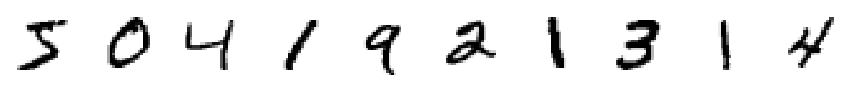

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10 * 1.5, 3))
for image_index in range(10):
  plt.subplot(1, 10, image_index+1)
  plot_image(X_valid[image_index])

In [0]:
X_train.shape

(55000, 28, 28)

# Creating Sequential API model:
Sequential API is the easiest model to build and run in Keras. A sequential model allows us to create models layer by layer in a step by step fashion.

First of all we need to import from Keras models Sequential model.

In [0]:
from tensorflow import keras
from keras.models import Sequential

After building model we can adding layers to this model.

In [0]:
model = keras.models.Sequential()


In [0]:
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In the first line we crate Sequential model. Next, we build the first layer and add it to the model. Next we add Dense hidden layer with 256 neurons. It will use ReLU activation function. Then we add a second Dense layer with 128 neurons with ReLU activation function as well. Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function.
Model’s ```summary()``` method display all the model layers, including each layers name, output shape of layers and number of parameters in each layer. This summary shows total number of parameters and number of trainable parameters and non-trainable parameters.

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


We can visualize the model:

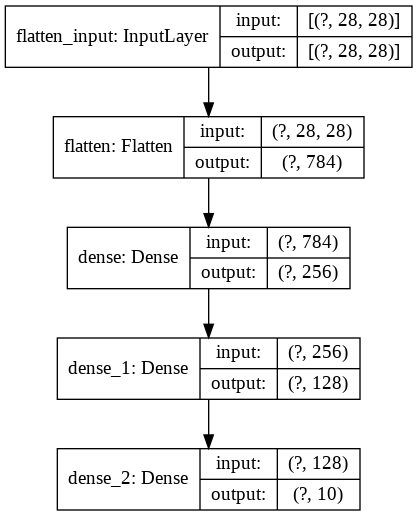

In [0]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Now, after creating model we need to call its compile() method to specify the loss function and optimizer to use.

In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

It is the time for training the model. For this we need just to call its ```fit()``` method.

In [0]:
history  = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 6s 110us/sample - loss: 0.6251 - accuracy: 0.8391 - val_loss: 0.3133 - val_accuracy: 0.9126
Epoch 2/20
55000/55000 [==============================] - 6s 101us/sample - loss: 0.2915 - accuracy: 0.9161 - val_loss: 0.2422 - val_accuracy: 0.9322
Epoch 3/20
55000/55000 [==============================] - 5s 100us/sample - loss: 0.2402 - accuracy: 0.9321 - val_loss: 0.2060 - val_accuracy: 0.9420
Epoch 4/20
55000/55000 [==============================] - 5s 99us/sample - loss: 0.2058 - accuracy: 0.9417 - val_loss: 0.1820 - val_accuracy: 0.9506
Epoch 5/20
55000/55000 [==============================] - 6s 101us/sample - loss: 0.1806 - accuracy: 0.9487 - val_loss: 0.1697 - val_accuracy: 0.9540
Epoch 6/20
55000/55000 [==============================] - 6s 101us/sample - loss: 0.1602 - accuracy: 0.9546 - val_loss: 0.1528 - val_accuracy: 0.9562
Epoch 7/20
55000/55000 [============================

learning curve for this model is like this:

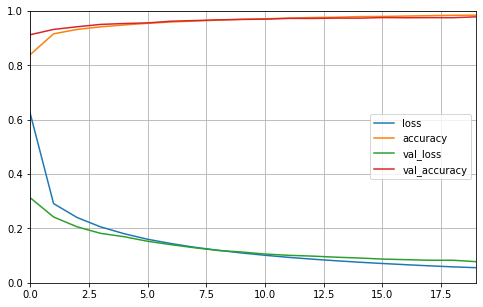

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

Sequential API is quite easy to use , but it is most limited. In Sequential API we can not create a model that:
* share layers
* have branches
* have multiple inputs
* have multiple output

Functional API solve this problem.

# Creating Functional API model:

In Functional model, part or all of the inputs directly connected to the output layer. This architecture makes it possible for the neural network to learn both deep patterns and simple rules. let to build this model.


In [0]:
input_ = keras.layers.Input(shape=[28, 28])
flatten = keras.layers.Flatten(input_shape=[28, 28])(input_)
hidden1 = keras.layers.Dense(2**14, activation="relu")(flatten)
hidden2 = keras.layers.Dense(512, activation='relu')(hidden1)
hidden3 = keras.layers.Dense(28*28, activation='relu')(hidden2)
reshap = keras.layers.Reshape((28, 28))(hidden3)
concat_ = keras.layers.Concatenate()([input_, reshap])
flatten2 = keras.layers.Flatten(input_shape=[28, 28])(concat_)
output = keras.layers.Dense(10, activation='softmax')(flatten2)
model = keras.Model(inputs=[input_], outputs=[output] )

In first layer we need to create an Input object. After, flatten input objects then we add Dense layers with ReLU activation function. Then we need to reshape hidden layer output to concatenate with input layer. For build output layer we need to flatten concatenated layer. Output layer has 10 neuron with softmax activation function. Finally, we create Keras Model with inputs and outputs.

For this model summary is like this:

In [0]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 16384)        12861440    flatten_1[0][0]                  
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 512)          8389120     dense_3[0][0]                    
______________________________________________________________________________________________

This is Functional model visualization:

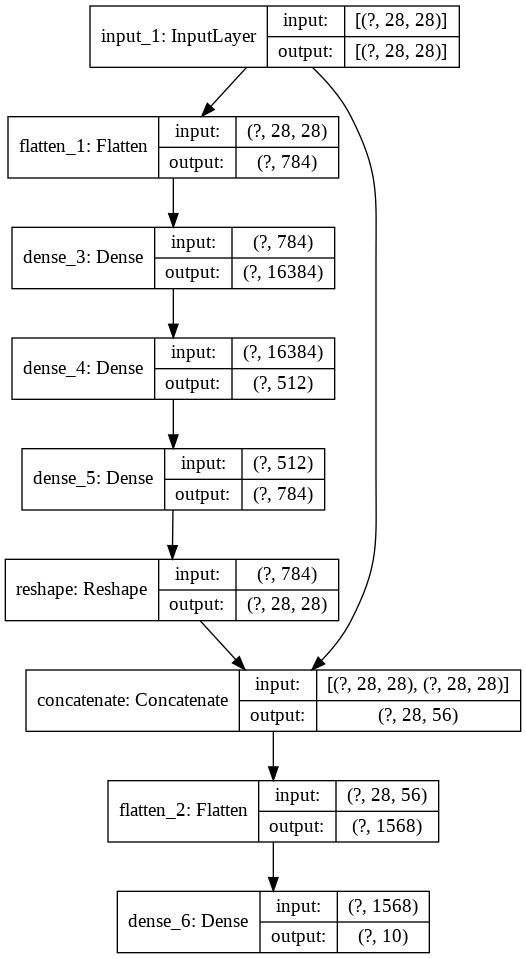

In [0]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

As you see in visualization part there is a by pass from input layer to concatenate layer which make it possible for neural network to learn through deep path and short pass.

After compile and fit the model, we have:

In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])
h = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 230s 4ms/sample - loss: 0.5737 - accuracy: 0.8599 - val_loss: 0.2872 - val_accuracy: 0.9224
Epoch 2/10
55000/55000 [==============================] - 227s 4ms/sample - loss: 0.2634 - accuracy: 0.9252 - val_loss: 0.2110 - val_accuracy: 0.9404
Epoch 3/10
55000/55000 [==============================] - 225s 4ms/sample - loss: 0.2030 - accuracy: 0.9426 - val_loss: 0.1697 - val_accuracy: 0.9514
Epoch 4/10
55000/55000 [==============================] - 229s 4ms/sample - loss: 0.1632 - accuracy: 0.9533 - val_loss: 0.1426 - val_accuracy: 0.9602
Epoch 5/10
55000/55000 [==============================] - 232s 4ms/sample - loss: 0.1342 - accuracy: 0.9623 - val_loss: 0.1242 - val_accuracy: 0.9672
Epoch 6/10
55000/55000 [==============================] - 220s 4ms/sample - loss: 0.1112 - accuracy: 0.9692 - val_loss: 0.1115 - val_accuracy: 0.9690
Epoch 7/10
55000/55000 [===========================

This is learning curve for Functional model:

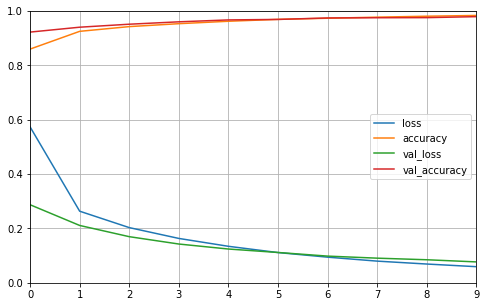

In [0]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1) 
plt.show()

For multiple inputs Functional model is perfect, for example if we want to send subset of input data through the wide path and other subset through the deep path. If we want to have multiple output again Functional model is perfect.

In [0]:
input_A = keras.layers.Input(shape=[28, 28])
input_B = keras.layers.Input(shape=[28, 28])
flatten_A = keras.layers.Flatten(input_shape=[28, 28])(input_A)
hidden1 = keras.layers.Dense(2**14, activation="relu")(flatten_A)
hidden2 = keras.layers.Dense(512, activation='relu')(hidden1)
hidden3 = keras.layers.Dense(28*28, activation='relu')(hidden2)
reshap = keras.layers.Reshape((28, 28))(hidden3)
concat_ = keras.layers.Concatenate()([input_B, reshap])
flatten = keras.layers.Flatten(input_shape=[28, 28])(concat_)
output = keras.layers.Dense(10, activation='softmax')(flatten)
model = keras.Model(inputs=[input_A, input_B], outputs=[output] )

In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 784)          0           input_2[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 16384)        12861440    flatten_3[0][0]                  
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 512)          8389120     dense_7[0][0]                    
____________________________________________________________________________________________

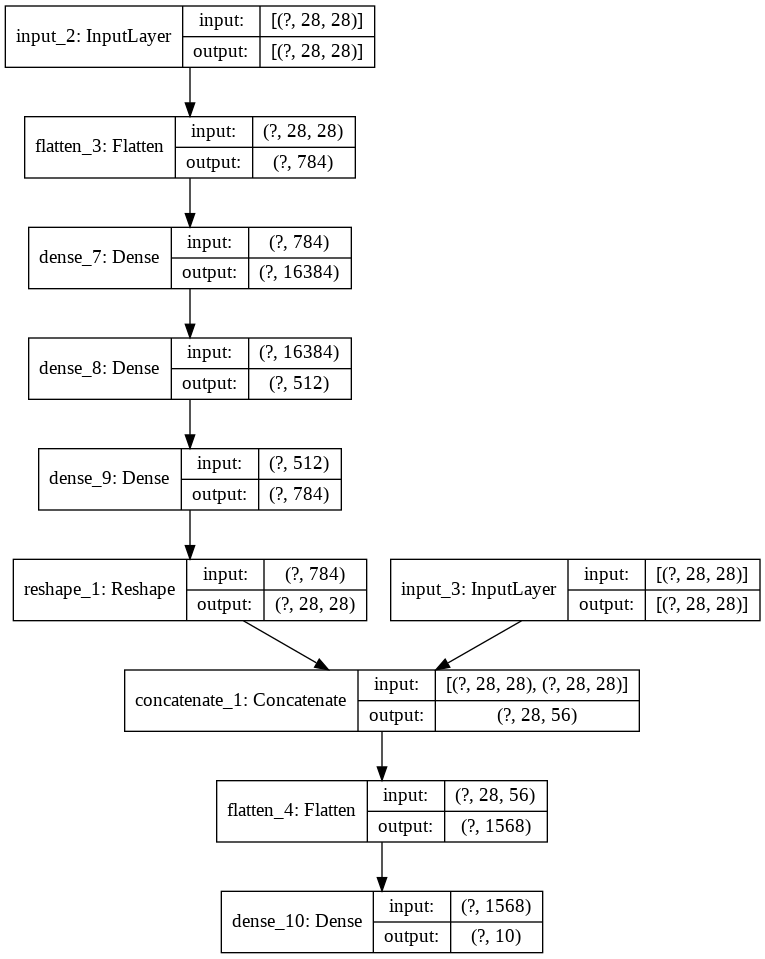

In [0]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])


In [0]:
X_train_A, X_train_B = X_train[:-27500], X_train[-27500:]
y_train_A, y_train_B = y_train[:-27500], y_train[-27500:]

In [0]:
h = model.fit((X_train_A, X_train_B), y_train_A, epochs=10 )

Train on 27500 samples
Epoch 1/10
27500/27500 [==============================] - 112s 4ms/sample - loss: 0.8975 - accuracy: 0.7605
Epoch 2/10
27500/27500 [==============================] - 109s 4ms/sample - loss: 0.3278 - accuracy: 0.9062
Epoch 3/10
27500/27500 [==============================] - 110s 4ms/sample - loss: 0.2599 - accuracy: 0.9252
Epoch 4/10
27500/27500 [==============================] - 110s 4ms/sample - loss: 0.2189 - accuracy: 0.9378
Epoch 5/10
27500/27500 [==============================] - 110s 4ms/sample - loss: 0.1869 - accuracy: 0.9472
Epoch 6/10
27500/27500 [==============================] - 110s 4ms/sample - loss: 0.1605 - accuracy: 0.9540
Epoch 7/10
27500/27500 [==============================] - 111s 4ms/sample - loss: 0.1398 - accuracy: 0.9603
Epoch 8/10
27500/27500 [==============================] - 110s 4ms/sample - loss: 0.1208 - accuracy: 0.9661
Epoch 9/10
27500/27500 [==============================] - 111s 4ms/sample - loss: 0.1057 - accuracy: 0.9707
Epoch

In [0]:
input_A = keras.layers.Input(shape=[28, 28])
input_B = keras.layers.Input(shape=[28, 28])

flatten = keras.layers.Flatten(input_shape=[28, 28])(input_A)
hidden1 = keras.layers.Dense(2**14, activation="relu")(flatten)
hidden2 = keras.layers.Dense(512, activation='relu')(hidden1)
hidden3 = keras.layers.Dense(28*28, activation='relu')(hidden2)
reshap = keras.layers.Reshape((28, 28))(hidden3)
concat_A = keras.layers.Concatenate()([input_A, reshap])
flatten_A = keras.layers.Flatten(input_shape=[28, 28])(concat_A)
output = keras.layers.Dense(10, activation='softmax')(flatten_A)


concat_B = keras.layers.Concatenate()([input_B, reshap])
flatten_B = keras.layers.Flatten(input_shape=[28, 28])(concat_B)

hidden_B = keras.layers.Dense(512, activation='relu')(flatten_B)
output_2nd = keras.layers.Dense(10, activation='softmax')(hidden_B)


First we create inputs, after flatten ```input_A```, Dense layers starts in the same time we have a deep patterns which connect input layer to concatenate layer. then with ```input_B``` concatenate with reshape layer and it build second branch with another output. Last line of code show how to build function model. As we have two input we should dividevinput ```X_train``` to two set as well as ```y_train```. Because we have two output set.

In [0]:
X_train_A, X_train_B = X_train[:-27500], X_train[-27500:]
X_test_A, X_test_B = X_test[:-2000], X_test[-2000:]
X_valid_A, X_valid_B = X_valid[:-1000], X_valid[-1000:]
y_train_A, y_train_B = y_train[:-27500], y_train[-27500:]
y_test_A, y_test_B = y_test[:-2000], y_test[-2000]
y_valid_A, y_valid_B = y_valid[:-1000], y_valid[-1000:]

and Functional model is like this:

In [0]:
model = keras.Model(inputs=[input_A, input_B], outputs=[output, output_2nd])

The visualize of this model is like this:

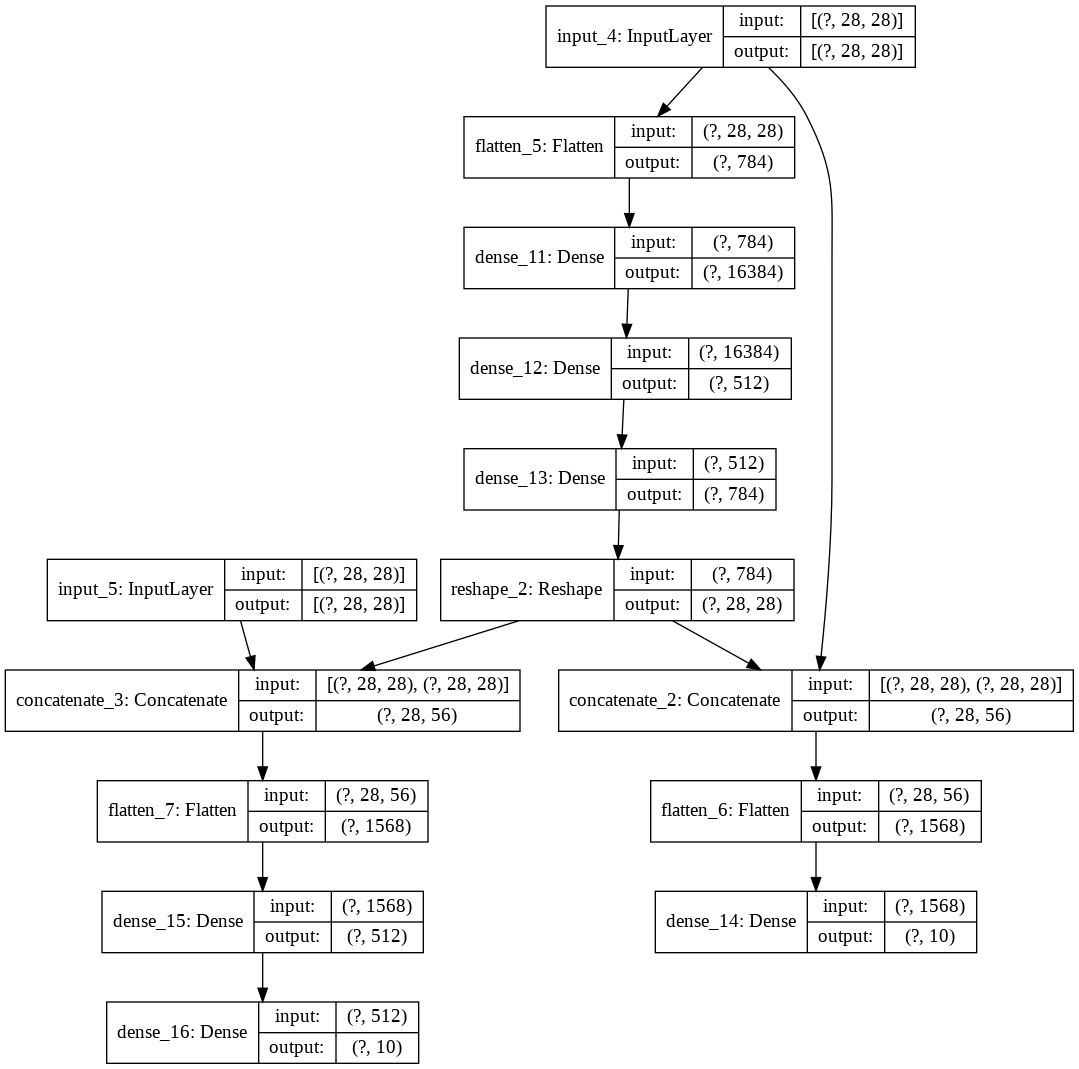

In [0]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

After compile and fit model we will have:

In [0]:
model.compile(loss=["sparse_categorical_crossentropy", "sparse_categorical_crossentropy"],
                     optimizer="sgd", metrics=["accuracy"])

In [0]:
h = model.fit([X_train_A, X_train_B], [y_train_A, y_train_B], epochs=10, validation_split= 0.2 )

Train on 22000 samples, validate on 5500 samples
Epoch 1/10
22000/22000 [==============================] - 102s 5ms/sample - loss: 1.8090 - dense_14_loss: 0.8990 - dense_16_loss: 0.9094 - dense_14_accuracy: 0.7963 - dense_16_accuracy: 0.7864 - val_loss: 0.9865 - val_dense_14_loss: 0.5372 - val_dense_16_loss: 0.4494 - val_dense_14_accuracy: 0.8555 - val_dense_16_accuracy: 0.8944
Epoch 2/10
22000/22000 [==============================] - 101s 5ms/sample - loss: 0.8510 - dense_14_loss: 0.3997 - dense_16_loss: 0.4511 - dense_14_accuracy: 0.8945 - dense_16_accuracy: 0.8782 - val_loss: 0.7256 - val_dense_14_loss: 0.3882 - val_dense_16_loss: 0.3375 - val_dense_14_accuracy: 0.8867 - val_dense_16_accuracy: 0.9093
Epoch 3/10
22000/22000 [==============================] - 101s 5ms/sample - loss: 0.6939 - dense_14_loss: 0.3130 - dense_16_loss: 0.3806 - dense_14_accuracy: 0.9146 - dense_16_accuracy: 0.8939 - val_loss: 0.6344 - val_dense_14_loss: 0.3270 - val_dense_16_loss: 0.3074 - val_dense_14_accu

Finally, this is learning curve for this model:

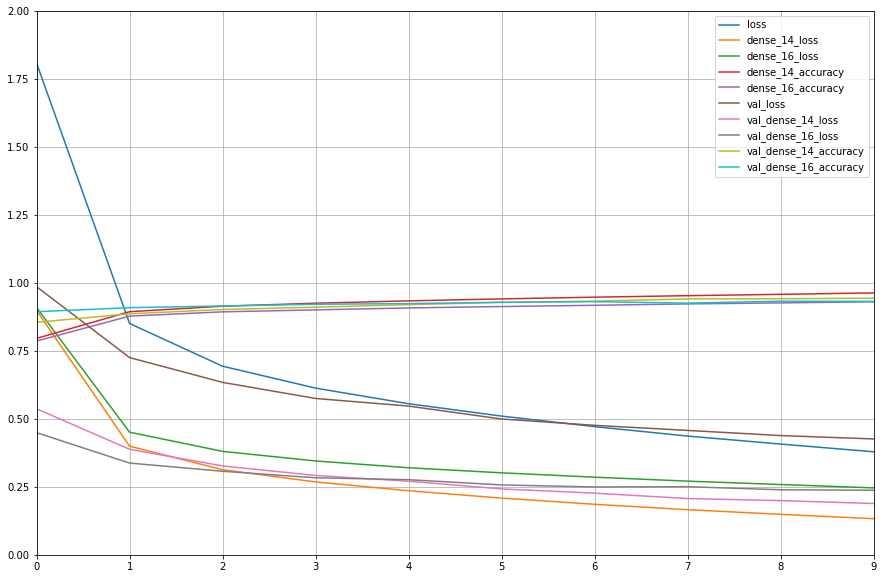

In [0]:
pd.DataFrame(h.history).plot(figsize=(15, 10))
plt.grid(True)
plt.gca().set_ylim(0, 2) 
plt.show()


As you can see, we can build any sort of architecture we want easily with the Functional API.